In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sklearn.svm
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy
import matplotlib.pyplot
  
with open("kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [2]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [3]:
with open("training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [4]:

attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [5]:

path = "kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)
 
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [6]:
df.shape

(494021, 43)

In [7]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [8]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [9]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [10]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:

num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'protocol_type', 'flag']

In [12]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [13]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

is_host_login                       0.000000
num_outbound_cmds                   0.000000
urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compro

In [14]:
df['protocol_type'].value_counts()


icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [15]:
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [16]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [17]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [18]:
df.drop('service',axis = 1,inplace= True)

In [19]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate            

In [20]:
df = df.drop(['target',], axis=1)
print(df.shape)

Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 33)
(330994, 32) (163027, 32)
(330994, 1) (163027, 1)


In [21]:
Y_train.values.ravel().shape

(330994,)

In [22]:
X_train.shape

(330994, 32)

In [23]:
data_inputs = X_train
data_outputs = Y_train.values.ravel()


In [24]:
#Genetic Algorithm Starting.

In [25]:
def reduce_features(solution, features):
    selected_elements_indices = numpy.where(solution == 1)[0]
    reduced_features = features[:, selected_elements_indices]
    return reduced_features


def classification_accuracy(labels, predictions):
    correct = numpy.where(labels == predictions)[0]
    accuracy = correct.shape[0]/labels.shape[0]
    return accuracy


def cal_pop_fitness(pop, features, labels, train_indices, test_indices):
    accuracies = numpy.zeros(pop.shape[0])
    idx = 0

    for curr_solution in pop:
        reduced_features = reduce_features(curr_solution, features)
        train_data = reduced_features[train_indices, :]
        test_data = reduced_features[test_indices, :]
      

        train_labels = labels[train_indices]
        test_labels = labels[test_indices]


        SV_classifier = sklearn.svm.SVC(gamma='scale')
        SV_classifier.fit(X=train_data, y=train_labels)

        predictions = SV_classifier.predict(test_data)
        accuracies[idx] = classification_accuracy(test_labels, predictions)
        idx = idx + 1
    return accuracies

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring


def mutation(offspring_crossover, num_mutations=2):
    mutation_idx = numpy.random.randint(low=0, high=offspring_crossover.shape[1], size=num_mutations)
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        offspring_crossover[idx, mutation_idx] = 1 - offspring_crossover[idx, mutation_idx]
    return offspring_crossover


In [26]:
num_samples = data_inputs.shape[0]
num_feature_elements = data_inputs.shape[1]


In [27]:
train_indices = numpy.arange(1, num_samples, 4)
test_indices = numpy.arange(0, num_samples, 4)
print(test_indices.shape)
test_indices.shape
print("Number of training samples: ", train_indices.shape[0])
print("Number of test samples: ", test_indices.shape[0])


(82749,)
Number of training samples:  82749
Number of test samples:  82749


In [28]:

"""
Genetic algorithm parameters:
    Population size
    Mating pool size
    Number of mutations
"""

'\nGenetic algorithm parameters:\n    Population size\n    Mating pool size\n    Number of mutations\n'

In [29]:
sol_per_pop = 8 # Population size.
num_parents_mating = 4 # Number of parents inside the mating pool.
num_mutations = 3 # Number of elements to mutate.


In [30]:
# Defining the population shape.
pop_shape = (sol_per_pop, num_feature_elements)


In [31]:
# Creating the initial population.
new_population = numpy.random.randint(low=0, high=2, size=pop_shape)
print(new_population.shape)


(8, 32)


In [32]:
best_outputs = []
num_generations = 1
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)

    best_outputs.append(numpy.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", best_outputs[-1])

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_shape[0]-parents.shape[0], num_feature_elements))

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=num_mutations)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation


Generation :  0
Best result :  0.9910331242673628
Generation :  1
Best result :  0.9919999033220945
Generation :  2
Best result :  0.9919999033220945
Generation :  3
Best result :  0.9919999033220945
Generation :  4
Best result :  0.9919999033220945
Generation :  5
Best result :  0.9930029365913787
Generation :  6
Best result :  0.9930029365913787
Generation :  7
Best result :  0.9933050550459824
Generation :  8
Best result :  0.9944772746498447
Generation :  9
Best result :  0.9944772746498447


In [33]:
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))[0]
best_match_idx = best_match_idx[0]

In [34]:
best_solution = new_population[best_match_idx, :]
best_solution_indices = numpy.where(best_solution == 1)[0]
best_solution_num_elements = best_solution_indices.shape[0]
best_solution_fitness = fitness[best_match_idx]


In [35]:
print("best_match_idx : ", best_match_idx)
print("best_solution : ", best_solution)
print("Selected indices : ", best_solution_indices)
print("Number of selected elements : ", best_solution_num_elements)
print("Best solution fitness : ", best_solution_fitness)


best_match_idx :  0
best_solution :  [0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1]
Selected indices :  [ 2  8  9 10 12 16 17 18 19 20 21 28 30 31]
Number of selected elements :  14
Best solution fitness :  0.9944772746498447


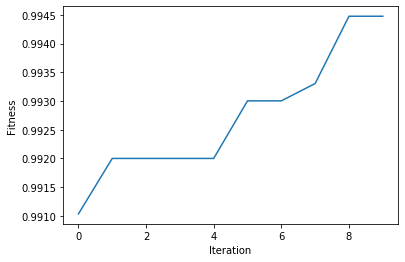

In [36]:
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()


In [ ]:
#Example output of Genetic Algorithm Reduction.

In [ ]:
""""""

 0  1  2  6  8  9 10 15 16 18 19 20 22 23 24 25 29 30 31 

duration   
protocol_type                    
flag        
wrong_fragment     
hot      
num_failed_logins                
logged_in                        
num_shells                       
num_access_files                 
is_host_login                    
is_guest_login                   
count                            
serror_rate                    
rerror_rate                    
same_srv_rate                  
diff_srv_rate                  
dst_host_diff_srv_rate         
dst_host_same_src_port_rate    
dst_host_srv_diff_host_rate           
""""""

In [ ]:
#Modify the original dataset and select only relevant features.

In [37]:
dfObj = pd.DataFrame(df)
tt= dfObj.iloc[: , best_solution_indices]

In [38]:
tt

,flag,hot,num_failed_logins,logged_in,root_shell,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,0,0,1,0,0,0,0,0,8,8,9,0.11,0.00
1,0,0,0,1,0,0,0,0,0,8,8,19,0.05,0.00
2,0,0,0,1,0,0,0,0,0,8,8,29,0.03,0.00
3,0,0,0,1,0,0,0,0,0,6,6,39,0.03,0.00
4,0,0,0,1,0,0,0,0,0,6,6,49,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,0,0,1,0,0,0,0,0,4,5,255,0.01,0.05
494017,0,0,0,1,0,0,0,0,0,6,6,255,0.17,0.05
494018,0,0,0,1,0,0,0,0,0,6,18,255,0.06,0.05
494019,0,0,0,1,0,0,0,0,0,6,12,255,0.04,0.05


In [39]:
#Fuzzy C Means Clustering starting. It takes the original dataset as such to improve the feature set.

In [40]:
import numpy as np, numpy.random
import pandas as pd
from scipy.spatial import distance
k = 2
p = 5
dat = df.drop(['Attack Type',], axis=1)

In [41]:
n = len(dat)
d = len(dat.columns)
addZeros = np.zeros((n, 1))
dat = np.append(dat, addZeros, axis=1)
print("The FCM algorithm: \n")
print("The training data: \n", dat)
print("\nTotal number of data: ",n)
print("Total number of features: ",d)
print("Total number of Clusters: ",k)

The FCM algorithm: 

The training data: 
 [[0.   1.   0.   ... 0.11 0.   0.  ]
 [0.   1.   0.   ... 0.05 0.   0.  ]
 [0.   1.   0.   ... 0.03 0.   0.  ]
 ...
 [0.   1.   0.   ... 0.06 0.05 0.  ]
 [0.   1.   0.   ... 0.04 0.05 0.  ]
 [0.   1.   0.   ... 0.17 0.05 0.  ]]

Total number of data:  494021
Total number of features:  32
Total number of Clusters:  2


In [42]:

C = np.zeros((k,d+1))
C

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [43]:
weight = np.random.dirichlet(np.ones(k),size=n)
print("\nThe initial weight: \n", np.round(weight,2))


The initial weight: 
 [[0.77 0.23]
 [0.41 0.59]
 [0.3  0.7 ]
 ...
 [0.1  0.9 ]
 [0.24 0.76]
 [0.77 0.23]]


In [44]:
weight.shape

(494021, 2)

In [45]:
for it in range(3): # Total number of iterations
    
    # Compute centroid
    for j in range(k):
        denoSum = sum(np.power(weight[:,j],2))
        
        sumMM =0
        for i in range(n):
            mm = np.multiply(np.power(weight[i,j],p),dat[i,:])
            sumMM +=mm
        cc = sumMM/denoSum
        C[j] = np.reshape(cc,d+1)
 
    #print("\nUpdating the fuzzy pseudo partition")
    for i in range(n):
        denoSumNext = 0
        for j in range(k):
             denoSumNext += np.power(1/distance.euclidean(C[j,0:d], dat[i,0:d]),1/(p-1))
        for j in range(k):
            w = np.power((1/distance.euclidean(C[j,0:d], dat[i,0:d])),1/(p-1))/denoSumNext
            weight[i,j] = w  

In [46]:
print("\nThe final weights: \n", np.round(weight,2))


The final weights: 
 [[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 ...
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


In [47]:
for i in range(n):    
    cNumber = np.where(weight[i] == np.amax(weight[i]))
    dat[i,d] = cNumber[0]
    
print("\nThe data with cluster number: \n", dat)


The data with cluster number: 
 [[0.   1.   0.   ... 0.11 0.   0.  ]
 [0.   1.   0.   ... 0.05 0.   1.  ]
 [0.   1.   0.   ... 0.03 0.   0.  ]
 ...
 [0.   1.   0.   ... 0.06 0.05 0.  ]
 [0.   1.   0.   ... 0.04 0.05 0.  ]
 [0.   1.   0.   ... 0.17 0.05 0.  ]]


In [48]:
# Sum squared error calculation
SSE = 0
for j in range(k):
    for i in range(n):
        SSE += np.power(weight[i,j],p)*distance.euclidean(C[j,0:d], dat[i,0:d])

print("\nSSE: ",np.round(SSE,4))


SSE:  122823153.4718


In [49]:
#set column names to the output of the fuzzy c means clustering algorithm.

In [50]:
cont = pd.DataFrame(dat, columns=['urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','cluster'])

In [51]:
cont.dtypes

urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                 float64
dst_host_srv_count             float64
dst_host_same_srv_rate   

In [52]:
#select all records in cluster 1.

In [53]:
ss = np.flatnonzero(cont['cluster'])

In [54]:
ss.shape

(152029,)

In [55]:
#Create new dataset with improved features and relevant records.

In [56]:
testObj = pd.DataFrame(df)
tes= testObj.iloc[ss , best_solution_indices]

In [57]:
tes

,flag,hot,num_failed_logins,logged_in,root_shell,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
1,0,0,0,1,0,0,0,0,0,8,8,19,0.05,0.00
8,0,0,0,1,0,0,0,0,0,8,8,89,0.12,0.04
10,0,0,0,1,0,0,0,0,0,18,18,109,0.06,0.05
14,0,0,0,1,0,0,0,0,0,1,1,149,0.07,0.04
16,0,0,0,1,0,0,0,0,0,2,2,169,0.03,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493971,0,0,0,1,0,0,0,0,0,1,11,255,1.00,0.11
494001,1,0,0,0,0,0,0,0,0,2,8,255,0.15,0.04
494006,0,0,0,1,0,0,0,0,0,1,1,255,0.50,0.05
494010,0,0,0,1,0,0,0,0,0,8,8,255,0.04,0.06


In [58]:
fet = testObj.iloc[ss , ]

In [59]:
fet

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
1,0,1,0,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,normal
8,0,1,0,210,151,0,0,0,0,0,...,0.0,1.0,0.0,0.00,8,89,0.0,0.12,0.04,normal
10,0,1,0,210,624,0,0,0,0,0,...,0.0,1.0,0.0,0.00,18,109,0.0,0.06,0.05,normal
14,0,1,0,241,259,0,0,0,0,0,...,0.0,1.0,0.0,0.00,14,149,0.0,0.07,0.04,normal
16,0,1,0,241,261,0,0,0,0,0,...,0.0,1.0,0.0,0.00,34,169,0.0,0.03,0.04,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493971,0,1,0,145,432,0,0,0,0,0,...,0.0,1.0,0.0,0.18,1,255,0.0,1.00,0.11,normal
494001,0,1,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.25,13,255,0.0,0.15,0.04,normal
494006,0,1,0,235,501,0,0,0,0,0,...,0.0,1.0,0.0,0.00,2,255,0.0,0.50,0.05,normal
494010,0,1,0,291,236,0,0,0,0,0,...,0.0,1.0,0.0,0.00,26,255,0.0,0.04,0.06,normal


In [60]:
print(cNumber)

(array([0], dtype=int64),)


In [61]:
count = 0

In [62]:
df

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00,normal
1,0,1,0,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,normal
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00,normal
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00,normal
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,310,1881,0,0,0,0,0,...,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05,normal
494017,0,1,0,282,2286,0,0,0,0,0,...,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05,normal
494018,0,1,0,203,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05,normal
494019,0,1,0,291,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05,normal


In [63]:
dat

array([[0.  , 1.  , 0.  , ..., 0.11, 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.05, 0.  , 1.  ],
       [0.  , 1.  , 0.  , ..., 0.03, 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , ..., 0.06, 0.05, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.04, 0.05, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.17, 0.05, 0.  ]])

In [64]:
df

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00,normal
1,0,1,0,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,normal
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00,normal
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00,normal
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,310,1881,0,0,0,0,0,...,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05,normal
494017,0,1,0,282,2286,0,0,0,0,0,...,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05,normal
494018,0,1,0,203,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05,normal
494019,0,1,0,291,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05,normal


In [65]:

print(dat.shape)


(494021, 33)


In [67]:
tt

,flag,hot,num_failed_logins,logged_in,root_shell,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,0,0,1,0,0,0,0,0,8,8,9,0.11,0.00
1,0,0,0,1,0,0,0,0,0,8,8,19,0.05,0.00
2,0,0,0,1,0,0,0,0,0,8,8,29,0.03,0.00
3,0,0,0,1,0,0,0,0,0,6,6,39,0.03,0.00
4,0,0,0,1,0,0,0,0,0,6,6,49,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,0,0,1,0,0,0,0,0,4,5,255,0.01,0.05
494017,0,0,0,1,0,0,0,0,0,6,6,255,0.17,0.05
494018,0,0,0,1,0,0,0,0,0,6,18,255,0.06,0.05
494019,0,0,0,1,0,0,0,0,0,6,12,255,0.04,0.05


In [68]:
#Implementation of the new improved dataset onto a classifier.

In [69]:
print(tt.shape)

# Target variable and train set
Y = fet[['Attack Type']]
X = tes

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 14)
(101859, 14) (50170, 14)
(101859, 1) (50170, 1)


In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model3 = RandomForestClassifier(n_estimators=30)

In [72]:

start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [73]:
print("Training time: ",end_time-start_time)

Training time:  1.3372282981872559


In [74]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [75]:
print("Testing time: ",end_time-start_time)

Testing time:  0.17390203475952148


In [76]:

print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.999342227981818
Test score is: 0.9975084711979271
